# Large data set

* DINEOF analysis of Western Mediterranean sea surface temperature.
* Download file and view content of NetCDF file with the following:

In [1]:
using PyPlot
using NCDatasets
using Missings

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1342
┌ Info: Precompiling NCDatasets [85f8d34a-cbdd-5861-8df4-14fed0d494ab]
└ @ Base loading.jl:1342
┌ Info: Precompiling Missings [e1d29d7a-bbdc-5cf2-9ac0-f12de2c33e28]
└ @ Base loading.jl:1342


Helper function for plotting tranposed arrays or arrays with missing data 

In [2]:
using PyCall
using PyCall: PyObject

# allow for plotting with missing values
function PyObject(a::Array{Union{T,Missing},N}) where {T,N}
    numpy_ma = PyCall.pyimport("numpy").ma
    pycall(numpy_ma.array, Any, coalesce.(a,zero(T)), mask=ismissing.(a))
end


PyObject

Download data file

In [3]:
if !isfile("WesternMedSST.nc")
    download("https://dox.ulg.ac.be/index.php/s/XkNUzGGVtnSCdT3/download","WesternMedSST.nc")
end
    
ds = Dataset("WesternMedSST.nc")

NCDataset: WesternMedSST.nc
Group: /

Dimensions
   lon = 327
   lat = 217
   time = 384

Variables
  lon   (327)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
     standard_name        = longitude
     units                = degree_east

  lat   (217)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     standard_name        = latitude
     units                = degree_north

  time   (384)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     standard_name        = latitude
     units                = days since 1900-01-01 00:00:00

  seviri_sst   (327 × 217 × 384)
    Datatype:    Float32
    Dimensions:  lon × lat × time
    Attributes:
     standard_name        = sea_water_temperature
     units                = degree_Celsius
     long_name            = sea surface temperature
     _FillValue           = -9999.0

  seviri_sst_filled   (327 × 217 × 384)
    Datatype:    Float32
    Dimensions:  lon × lat × time
    Attributes:
     stand

In [5]:
close(ds);

# Useful functions

 * display the content of a NetCDF file.
```julia
Dataset("WesternMedSST.nc")
```

 * Read a variable from a NetCDF file.
```julia
ds = Dataset("WesternMedSST.nc")
SST = ds["seviri_sst_filled"][:]
close(ds)
```

More info at https://github.com/Alexander-Barth/NCDatasets.jl

# Example

Load modules and setup some helper functions

In [6]:
using NCDatasets
using PyPlot

# Helper function for dateticks
function datetick(axis,fmt = "%Y-%m-%d")
    ax = gca()
    formatter = matplotlib[:dates][:DateFormatter](fmt)

    if axis == :x
        ax[:xaxis][:set_major_formatter](formatter)
    else
        ax[:yaxis][:set_major_formatter](formatter)
    end
end



datetick (generic function with 2 methods)

In [7]:
using DelimitedFiles
sl  = readdlm("8762075.sealevel.txt",comments=true, comment_char='%')


8784×8 Matrix{Float64}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮             
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.0  1

In [8]:
using Dates
DateTime([sl[1,1:5]; 0]...) 


2004-01-01T00:00:00

In [9]:

DateTime(sl[1,1],sl[1,2],sl[1,3],sl[1,4],sl[1,5],0)

2004-01-01T00:00:00

In [10]:
[i^2 for i = 1:10]

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [11]:
size(sl,1)

8784

In [12]:
t = [DateTime(sl[i,1],sl[i,2],sl[i,3],sl[i,4],sl[i,5],0) 
    for i = 1:size(sl,1)];


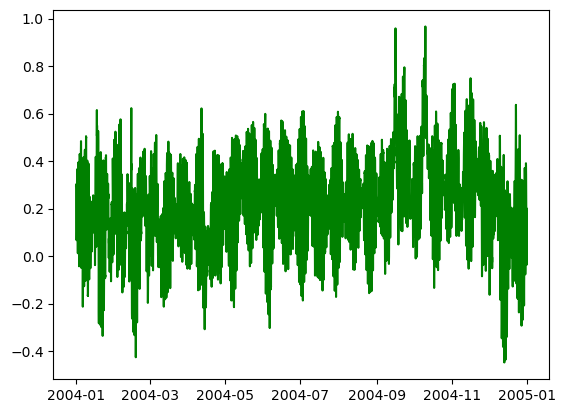

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4b9de7c340>

In [13]:
plot(t[:],sl[:,6],"g")


In [14]:
fname = "WesternMedSST.nc";
ds = Dataset(fname)
lon = ds["lon"][:];
lat = ds["lat"][:];
times = nomissing(ds["time"][:]);
SST = ds["seviri_sst"][:];
mask = ds["mask"][:];
close(ds)


closed NetCDF NCDataset

In [15]:
times

384-element Vector{DateTime}:
 2013-08-02T00:00:00
 2013-08-02T01:00:00
 2013-08-02T02:00:00
 2013-08-02T03:00:00
 2013-08-02T04:00:00
 2013-08-02T05:00:00
 2013-08-02T06:00:00
 2013-08-02T07:00:00
 2013-08-02T08:00:00
 2013-08-02T09:00:00
 2013-08-02T10:00:00
 2013-08-02T11:00:00
 2013-08-02T12:00:00
 ⋮
 2013-08-17T12:00:00
 2013-08-17T13:00:00
 2013-08-17T14:00:00
 2013-08-17T15:00:00
 2013-08-17T16:00:00
 2013-08-17T17:00:00
 2013-08-17T18:00:00
 2013-08-17T19:00:00
 2013-08-17T20:00:00
 2013-08-17T21:00:00
 2013-08-17T22:00:00
 2013-08-17T23:00:00

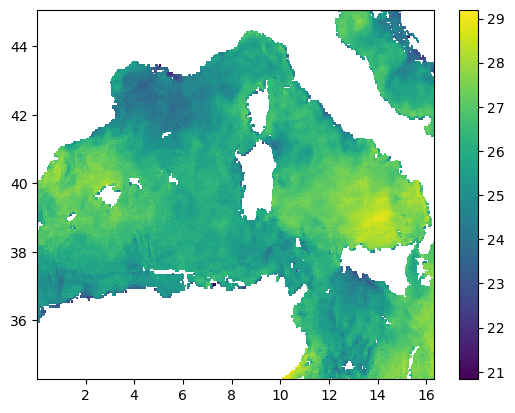

In [16]:
SSTdiff = SST[:,:,2] - SST[:,:,1]
pcolor(lon,lat,SST[:,:,2]'); colorbar();

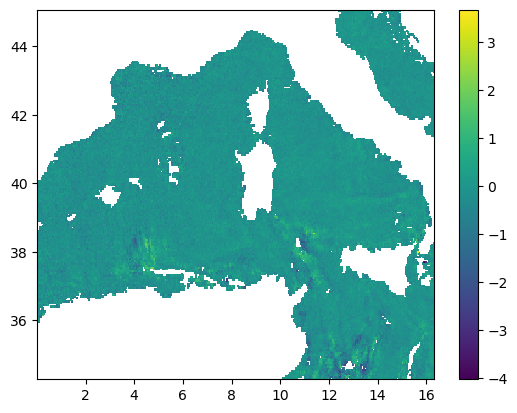

In [17]:
SSTdiff = SST[:,:,2] - SST[:,:,1]
pcolor(lon,lat,SSTdiff'); colorbar();

### Plot the first time instance of the data set with pcolor.

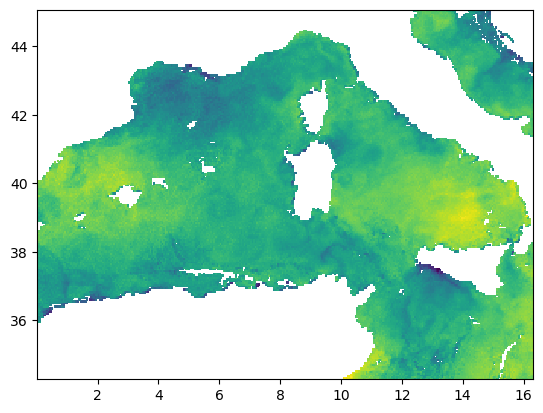

In [18]:
ds = Dataset("WesternMedSST.nc")
lon = ds["lon"][:]
lat = ds["lat"][:]
close(ds)

pcolor(lon,lat,SST[:,:,1]');

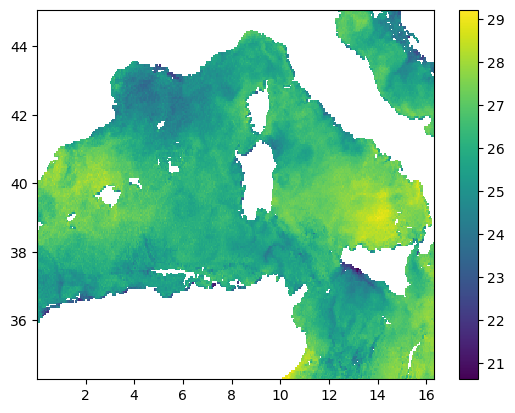

In [19]:
pcolor(lon,lat,SST[:,:,1]');
colorbar();


In [20]:
SST[1,1,1]

missing

In [21]:
ismissing(SST[1,1,1])

true

In [22]:
k = 1
count = 0
if !ismissing(SST[1,1,k])
    global count
    # do something
    count = count+1
end
count

0

### Plot the percentage of valid data grid point over time.

In [23]:
imax = size(SST,1)
jmax = size(SST,2)
kmax = size(SST,3)


384

In [24]:
imax, jmax, kmax = size(SST)

(327, 217, 384)

In [25]:
nbpixels = zeros(kmax)

for k = 1:kmax
  count = 0

  for j = 1:jmax
    for i = 1:imax
       if !ismissing(SST[i,j,k])
         count = count + 1
       end        
    end
        
    nbpixels[k] = count
  end
end
percentage = 100 * nbpixels/(imax*jmax)


384-element Vector{Float64}:
 57.561408700799056
 57.13862934934258
 57.062529066080415
 57.09635141419693
 57.213320368099886
 56.521371496216126
 53.17577756169055
 53.16309418114686
 53.41535252751589
 53.914232162234526
 54.03824743866176
 54.50471398976874
 55.01486774052622
  ⋮
 44.215673839823
 49.05790667850449
 49.10582167166955
 49.8358206851844
 49.8358206851844
 50.157132992291324
 50.262827830155445
 49.31580208289294
 48.77746304203836
 47.87976155244578
 47.68951084429037
 47.11734945531927

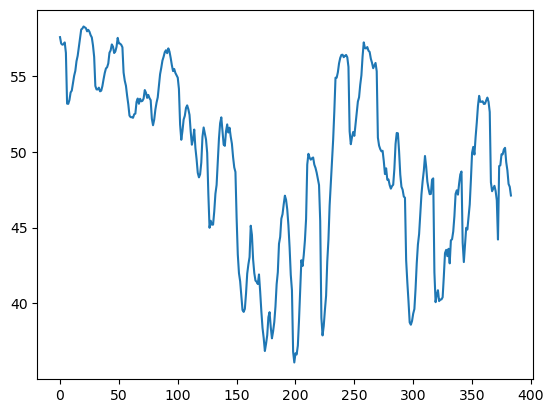

In [26]:
plot(percentage);

In [27]:
sum(sum(.!ismissing.(SST[:,:,1]),dims = 1),dims = 2)

1×1 Matrix{Int64}:
 40845

In [28]:

sum(.!ismissing.(SST[:,:,1]),dims = [1,2])

1×1 Matrix{Int64}:
 40845

In [29]:
count = zeros((imax,jmax))
for j = 1:jmax
    for i = 1:imax
        for k = 1:kmax
            if !ismissing(SST[i,j,k])
                count[i,j] = count[i,j] + 1
            end
        end

        count[i,j] = 100*count[i,j]/kmax
    end
end


In [30]:
count = 100 * dropdims(sum(.!ismissing.(SST),dims = 3),dims = 3) / kmax;


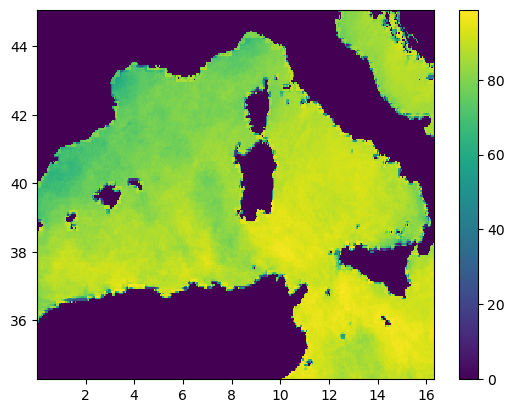

In [31]:
pcolor(lon,lat,count'), colorbar();


### For all time instances, what is the percentage of sea grid points not covered by clouds?

In [32]:
count = zeros(Int,(kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !ismissing(SST[i,j,k])
                count[k] = count[k] + 1
            end
        end
    end
end


In [33]:
count[1:4]

4-element Vector{Int64}:
 40845
 40545
 40491
 40515

In [34]:
count = dropdims(sum(sum(.!ismissing.(SST),dims = 1),dims = 2), dims= (1,2))
count[1:4]

4-element Vector{Int64}:
 40845
 40545
 40491
 40515

In [35]:
percentage = 100 * count / sum(mask)
percentage[1:10]

10-element Vector{Float64}:
 98.23468577887876
 97.513167704851
 97.38329445152601
 97.44101589744822
 97.64063589792924
 96.45975131677048
 90.75013829096419
 90.72849274874335
 91.15899853291324
 92.010389860266

In [36]:
times[1:5]

5-element Vector{DateTime}:
 2013-08-02T00:00:00
 2013-08-02T01:00:00
 2013-08-02T02:00:00
 2013-08-02T03:00:00
 2013-08-02T04:00:00

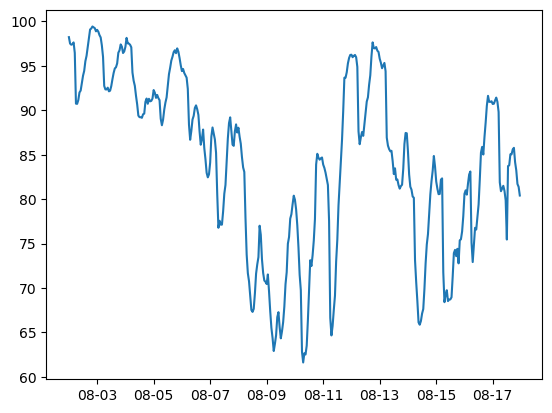

In [37]:
plot(times,percentage);
datetick(:x,"%m-%d")


### Plot the time average of SST

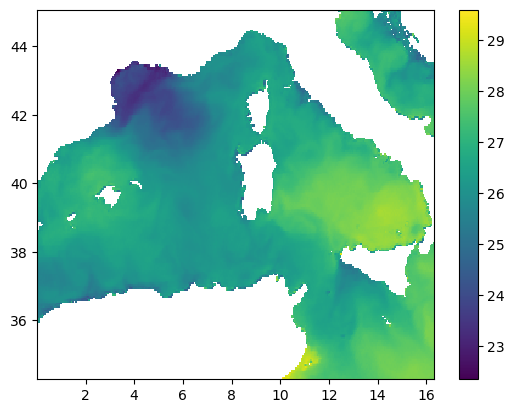

PyObject <matplotlib.colorbar.Colorbar object at 0x7f4b83f3a580>

In [38]:
SST2 = copy(SST);
SST2[ismissing.(SST)] .= 0;
count = sum(.!ismissing.(SST),dims = 3)
meanSST = allowmissing(sum(SST2,dims = 3) ./ count);
meanSST[count .== 0] .= missing;


pcolor(lon,lat,meanSST[:,:,1]');   colorbar()


### Plot the space average of SST 

* assuming that all pixels have the same area

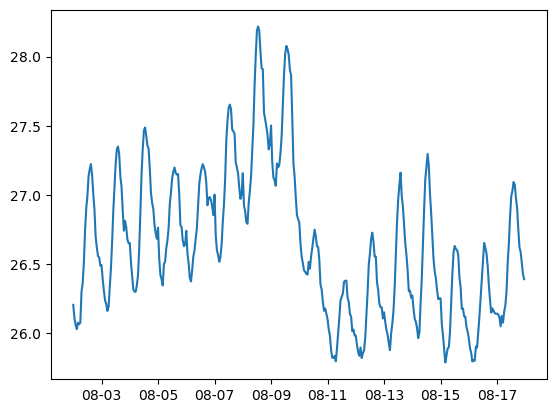

In [39]:
meanSSTt = sum(sum(SST2,dims = 1),dims = 2) ./ sum(sum(.!ismissing.(SST),dims = 1),dims = 2);
meanSSTt = dropdims(meanSSTt,dims = (1,2));
plot(times,meanSSTt)
datetick(:x,"%m-%d")


### Make a time serie with the number of pixels with the temperature larger than 25 degree Celsius.

In [40]:
count = zeros((kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !ismissing(SST[i,j,k]) && (SST[i,j,k] > 25)
                count[k] = count[k] + 1
            end
        end
    end
end


In [41]:
count[1:5]

5-element Vector{Float64}:
 36399.0
 35338.0
 34948.0
 34721.0
 34993.0

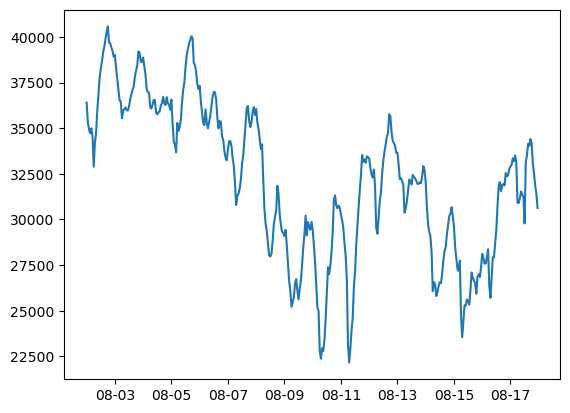

In [42]:
plot(times,count)
datetick(:x,"%m-%d")


### Make a time serie of the area (in km2) with the temperature larger than 25 degree Celsius

In [43]:
# Earth Radius (in km)
R = 6371;
# surface of each cell
dx = pi * 0.05 * R/180;
dy = pi * 0.05 * R/180 * cos.(pi*lat/180);


In [44]:
area = zeros((kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !ismissing(SST[i,j,k]) && (SST[i,j,k] > 25)
                area[k] = area[k] + dx * dy[j]
            end
        end
    end
end


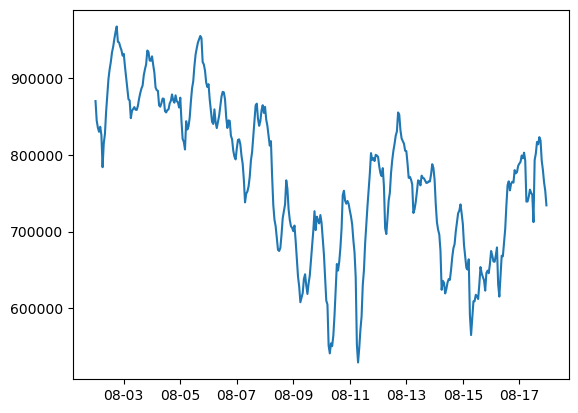

In [45]:
plot(times,area)
datetick(:x,"%m-%d")


In [46]:
average = zeros(imax,jmax)
  
for i = 1:imax
    for j = 1:jmax
       mymean = 0.
       count = 0

       for k = 1:kmax
           if !ismissing(SST[i,j,k])
              mymean = mymean + SST[i,j,k]
              count = count+1
            end
        end
        
        mymean = mymean/count
        average[i,j] = mymean   
    end
end



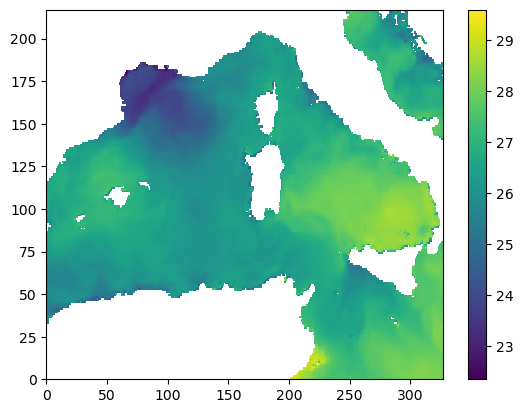

In [47]:
pcolor(average'); colorbar();


Ideas for exercises
* Compute the mean over time for every pixel
* Compute the standard deviation over time for every pixel
* Make a map with the minimum temperature
* Make a map with the time index at which the temperature is minimum
